In [1]:
# Importation des Librairies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



# Importation des XLSX
Web = pd.read_excel('web.xlsx') 
Erp = pd.read_excel('erp.xlsx')
Liaison = pd.read_excel('liaison.xlsx')

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# Pour avoir la taille du Tableau 
Web.shape
len(Web.sku.unique())

715

In [3]:
# Description de sku dans la table Web
Web.sku.describe()

count      1428
unique      714
top       15360
freq          2
Name: sku, dtype: int64

In [4]:
# Print pour le nombre de ligne dupliquées
print(len(Web['sku'])-len(Web['sku'].drop_duplicates()), 'est le nombre de lignes qui ont été dupliquées')

798 est le nombre de lignes qui ont été dupliquées


In [5]:
# erreur informatique probable
Web[Web.sku.isna() & Web.post_name.notna()]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [6]:
# Produits qui ont été dupliqués (5)
Web = Web[Web.duplicated(['sku']) & Web.sku.notna()]
Web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
803,19815,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [7]:
#doublon attachment = image jpeg
Web[Web.sku == 15298]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
799,15298,0,0,0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [8]:
#Produits qui n'ont pas de Sku à renseigner (2)
Web[Web.sku.isnull()].describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Visu des données not null pour Web lignes et colonnes
Web_notnull = Web[Web.sku.notnull()]
Web_notnull.shape

(714, 28)

In [10]:
# Describe de ERP pour product is null
Erp[Erp.product_id.isnull()].describe()

,product_id,onsale_web,price,stock_quantity
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [11]:
# Nombre d'ERP unique
Erp.shape
len(Erp.product_id.unique())

825

In [12]:
# Describe du product id dans ERP
Erp.product_id.describe()

count     825.000000
mean     5162.597576
std       902.644635
min      3847.000000
25%      4348.000000
50%      4907.000000
75%      5805.000000
max      7338.000000
Name: product_id, dtype: float64

In [13]:
# Visu des données not null pour Erp lignes et colonnes
Erp_notnull = Erp[Erp.product_id.notnull()]
Erp_notnull.shape

(825, 5)

In [14]:
# 820, 821 en NaN
print(Liaison)

     product_id   id_web
0          3847    15298
1          3849    15296
2          3850    15300
3          4032    19814
4          4039    19815
..          ...      ...
820        7203      NaN
821        7204      NaN
822        7247  13127-1
823        7329  14680-1
824        7338    16230

[825 rows x 2 columns]


In [15]:
# Liste le nombre de lignes, colonnes pour Liaison not null
Liaison_notnull = Liaison[Liaison.id_web.notnull()]
Liaison_notnull.shape

(734, 2)

In [16]:
# Pour avoir la difference Liaison / Liaison_notnull 
Liaison.shape

(825, 2)

In [17]:
# Visu de Liaison
Liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [18]:
# Création des jointures 
Data_Frame = pd.merge(Erp , Liaison,
                      on = 'product_id' , how = 'outer') 
         
Data_Frame_2 = pd.merge( Web, Data_Frame, 
                        left_on = 'sku' , right_on = 'id_web' , how = 'outer' , indicator = True)

In [19]:
# Visu de Data_Frame_2

Data_Frame_2

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
0,15298,0.0,0.0,0.0,0.0,6.0,NaN,NaN,2.0,2018-02-08 12:58:52,...,attachment,image/jpeg,0.0,3847,1,24.2,0,outofstock,15298,both
1,15296,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,attachment,image/jpeg,0.0,3849,1,34.3,0,outofstock,15296,both
2,15300,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,attachment,image/jpeg,0.0,3850,1,20.8,0,outofstock,15300,both
3,19814,0.0,0.0,0.0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,attachment,image/jpeg,0.0,4032,1,14.1,0,outofstock,19814,both
4,19815,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,2018-02-12 09:04:37,...,attachment,image/jpeg,0.0,4039,1,46.0,0,outofstock,19815,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5954,0,18.8,0,outofstock,15609,right_only
821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5955,0,27.3,0,outofstock,14377,right_only
822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5957,0,39.0,0,outofstock,13577,right_only
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,6100,0,12.9,0,outofstock,15529,right_only


In [20]:
# Incohérence entre les 2 ERP pour le _merge different de both
Data_Frame_2[Data_Frame_2._merge != 'both']

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status,id_web,_merge
714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4055,0,86.1,0,outofstock,NaN,right_only
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4090,0,73.0,0,outofstock,NaN,right_only
716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4092,0,47.0,0,outofstock,NaN,right_only
717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4195,0,14.1,0,outofstock,NaN,right_only
718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,4209,0,73.5,0,outofstock,NaN,right_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5954,0,18.8,0,outofstock,15609,right_only
821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5955,0,27.3,0,outofstock,14377,right_only
822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,5957,0,39.0,0,outofstock,13577,right_only
823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,6100,0,12.9,0,outofstock,15529,right_only


In [21]:
# Suppression des données 
Data_Frame_2.drop(Data_Frame_2[Data_Frame_2['_merge']!= 'both' ].index,inplace = True)

# Choix des colonnes
Data_Frame_2 = Data_Frame_2[['sku' , 'total_sales' , 'product_id' , 'id_web' , 'price' , 'post_title']]

# Visu de Data_frame_2
Data_Frame_2.describe(include='all')

,sku,total_sales,product_id,id_web,price,post_title
count,714.0,714.000000,714.000000,714.0,714.000000,714
unique,714.0,NaN,NaN,714.0,NaN,711
top,15360.0,NaN,NaN,15360.0,NaN,Domaine Hauvette IGP Alpilles Jaspe 2017
freq,1.0,NaN,NaN,1.0,NaN,2
mean,NaN,4.012605,5032.557423,NaN,32.493137,NaN
std,NaN,8.518183,790.510878,NaN,27.810525,NaN
min,NaN,0.000000,3847.000000,NaN,5.200000,NaN
25%,NaN,0.000000,4280.250000,NaN,14.100000,NaN
50%,NaN,1.000000,4796.000000,NaN,23.550000,NaN
75%,NaN,4.000000,5710.500000,NaN,42.175000,NaN


In [22]:
# Contrôle des doublons sur post_title
Data_Frame_2[Data_Frame_2.duplicated(['post_title'])].sort_values('post_title').head()

,sku,total_sales,product_id,id_web,price,post_title
712,13127-1,0.0,7247,13127-1,54.8,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
698,16068,1.0,6665,16068,27.7,Domaine Hauvette IGP Alpilles Jaspe 2017
490,14828,0.0,5544,14828,61.6,Marc Colin Et Fils Chassagne-Montrachet Blanc ...


In [23]:
# Vérif Doublon 1
doublon1 = Data_Frame_2[(Data_Frame_2.post_title == 'Clos du Mont-Olivet Châteauneuf-du-Pape 2007')]
doublon1

,sku,total_sales,product_id,id_web,price,post_title
469,16034,3.0,5465,16034,54.8,Clos du Mont-Olivet Châteauneuf-du-Pape 2007
712,13127-1,0.0,7247,13127-1,54.8,Clos du Mont-Olivet Châteauneuf-du-Pape 2007


In [24]:
# Vérif Doublon 2
doublon2 = Data_Frame_2[(Data_Frame_2.post_title == 'Domaine Hauvette IGP Alpilles Jaspe 2017')]
doublon2

,sku,total_sales,product_id,id_web,price,post_title
184,15292,1.0,4288,15292,26.7,Domaine Hauvette IGP Alpilles Jaspe 2017
698,16068,1.0,6665,16068,27.7,Domaine Hauvette IGP Alpilles Jaspe 2017


In [25]:
# Vérif Doublon 3
doublon3 = Data_Frame_2[(Data_Frame_2.post_title == 'Marc Colin Et Fils Chassagne-Montrachet Blanc Les Vide-Bourses 1er Cru 2016')]
doublon3

,sku,total_sales,product_id,id_web,price,post_title
229,14000,2.0,4597,14000,61.6,Marc Colin Et Fils Chassagne-Montrachet Blanc ...
490,14828,0.0,5544,14828,61.6,Marc Colin Et Fils Chassagne-Montrachet Blanc ...


In [26]:
# Calcul des ventes + prix par produit
Total = ((Data_Frame_2.total_sales) * (Data_Frame_2.price))
Total

0      145.2
1        0.0
2        0.0
3       42.3
4        0.0
       ...  
709     42.0
710      0.0
711      0.0
712      0.0
713      0.0
Length: 714, dtype: float64

In [27]:
# Calcul du CA + visu
Total_2 = Total.sum()
print(Total_2 , 'corresponds aux CA')

70568.6 corresponds aux CA


In [28]:
# Choix des colonnes pour Listing_vin
Listing_Vin = Data_Frame_2[['total_sales' , 'price' , 'post_title']]

# Calcul du chiffre d'affaire pour le Listing_vin
Listing_Vin["chiffre_affaire"] = Listing_Vin['price']*Listing_Vin['total_sales']

# Visu Listing_vin
print(Listing_Vin)

     total_sales  price                                         post_title  \
0            6.0   24.2        Pierre Jean Villa Saint-Joseph Préface 2018   
1            0.0   34.3    Pierre Jean Villa Saint-Joseph Rouge Tildé 2017   
2            0.0   20.8  Pierre Jean Villa Crozes-Hermitage Accroche Co...   
3            3.0   14.1  Pierre Jean Villa IGP Collines Rhodaniennes Ga...   
4            0.0   46.0          Pierre Jean Villa Côte Rôtie Carmina 2017   
..           ...    ...                                                ...   
709          5.0    8.4   Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015   
710          0.0   27.5         Camin Larredya Jurançon Sec La Virada 2018   
711          0.0   69.0     Domaine Jamet Côte Rôtie Fructus Voluptas 2018   
712          0.0   54.8       Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
713          0.0   16.3  Domaine Saint-Nicolas Vin de France Blanc Les ...   

     chiffre_affaire  
0              145.2  
1                

<ipython-input-28-b7ac4a19afeb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Listing_Vin["chiffre_affaire"] = Listing_Vin['price']*Listing_Vin['total_sales']


In [29]:
# Prix du vin le moins cher
Mini = Listing_Vin[Listing_Vin.price == Listing_Vin.price.min()]

In [30]:
# Prix du vin le plus cher
Maxi = Listing_Vin[Listing_Vin.price == Listing_Vin.price.max()]

In [31]:
# Description Listing_vin 
Listing_Vin.price.describe(include='all')

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [32]:
# Calcul du minimum avant données abberantes
Minimum = 42.175000 + 1.5 * (42.175000 - 14.100000 )
print("L'élément minimum est:", Minimum)

L'élément minimum est: 84.2875


In [33]:
# Calcul du maximum négatif avant abberation
Maximum = 14.100000 - 1.5 * (42.175000 - 14.100000 )
print("L'élément le plus grand est :", Maximum )

L'élément le plus grand est : -28.012499999999996


In [34]:
# Listing du nombre de données abberantes
Outlier = Listing_Vin[Listing_Vin['price'] > Minimum ]
len(Outlier)

32

In [35]:
# Visu des données abberantes
Outlier.head(32)

,total_sales,price,post_title,chiffre_affaire
63,0.0,100.0,Zind-Humbrecht Riesling Grand Cru Rangen De Th...,0.0
65,0.0,88.4,Zind-Humbrecht Pinot Gris Grand Cru Rangen De ...,0.0
199,5.0,225.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,1125.0
201,11.0,126.5,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,1391.5
205,1.0,85.6,Champagne Larmandier-Bernier Grand Cru Les Che...,85.6
218,13.0,176.0,Cognac Frapin VIP XO,2288.0
219,2.0,108.5,Cognac Frapin Château de Fontpinot XO,217.0
221,0.0,157.0,Cognac Frapin Château de Fontpinot 1989 20 Ans...,0.0
222,1.0,104.0,Cognac Frapin Cigar Blend,104.0
227,0.0,109.6,Château de Meursault Puligny-Montrachet 1er Cr...,0.0


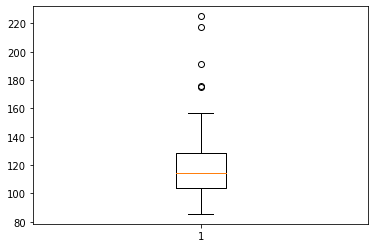

In [36]:
# Visu boîte à moustache des données abberantes
plt.boxplot(Outlier.price)
plt.show()